In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from custom_func import *

df = pd.read_csv('useful_boat_data.csv')

In [89]:
country_keys = df['Country'].value_counts().index[:20]  # assign country keys to the top countries by count

In [64]:
country_keys

Index(['Germany', 'Italy', 'France', 'Switzerland', 'Netherlands',
       'Croatia (Hrvatska)', 'Spain', 'United Kingdom', 'Denmark', 'Portugal',
       'Austria', 'Greece', 'Malta', 'Turkey', 'Belgium', 'Poland', 'Slovenia',
       'Finland', 'Montenegro', 'United Arab Emirates'],
      dtype='object')

In [71]:
palette_dict = create_palette_dict(list(country_keys), palette='Set3')

In [90]:
# create this function to plot the same type of bar plot, so I don't repeat myself

def top_barplot(plot_data, n=10, xlabel=' ', ylabel=' ', title=' ', color_palette = None):
    
    fig, ax = plt.subplots(figsize = (10,6))
    sns.barplot(y=plot_data.index[:n], x = plot_data.values[:n], palette = color_palette, ax=ax)
    ax.set(
        xlabel = xlabel, 
        ylabel = ylabel, 
        title = title
    )
    plt.show()

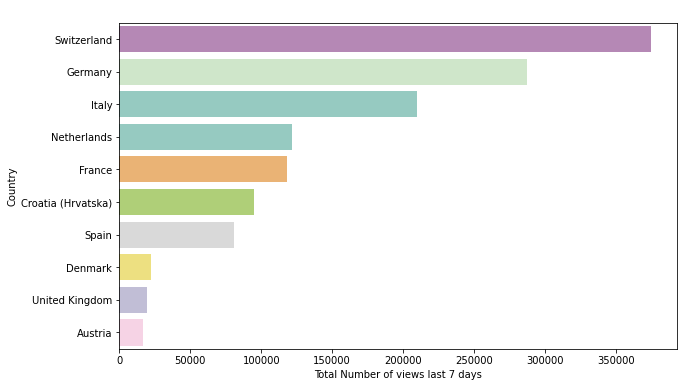

In [88]:
plot_data = df.groupby('Country')['Number of views last 7 days'].sum().sort_values(ascending=False)

top_barplot(plot_data, n=10, 
            xlabel = 'Total Number of views last 7 days', 
            ylabel = 'Country', 
            title=' ', 
            color_palette = palette_dict)

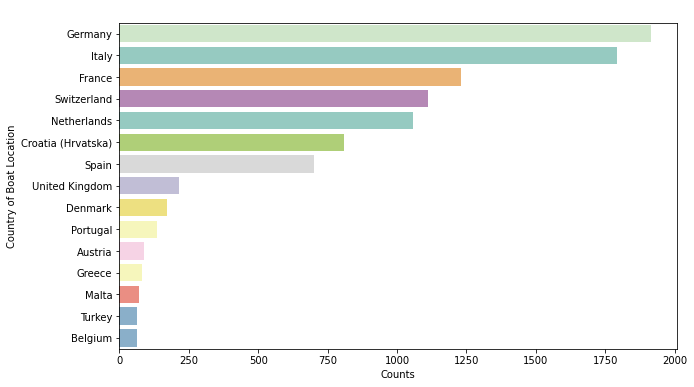

In [74]:
plot_data = df['Country'].value_counts()

top_barplot(plot_data, n=15, 
            xlabel = 'Counts', 
            ylabel = 'Country of Boat Location', 
            title=' ', color_palette = palette_dict)

In [2]:
lengths = df['Length']

In [14]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [24]:
res = df[['Price_Euros']].quantile(np.linspace(0, 1, 11), interpolation='linear')
res

,Price_Euros
0.0,3224.0
0.1,21078.9
0.2,35147.0
0.3,49900.0
0.4,68900.0
0.5,92105.0
0.6,135000.0
0.7,199000.0
0.8,299000.0
0.9,580000.0


In [52]:
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
res = pd.qcut(df['Price_Euros'], 5)

In [53]:
df['Price_Euros'].head(10)

0     14751.00
1     34650.00
2    124641.00
3    949000.00
4     19701.00
5     48015.00
6      4949.01
7     35640.00
8      6435.00
9      3762.00
Name: Price_Euros, dtype: float64

In [54]:
res

0          (3223.999, 35147.0]
1          (3223.999, 35147.0]
2          (68900.0, 135000.0]
3       (299000.0, 31000000.0]
4          (3223.999, 35147.0]
                 ...          
9883        (35147.0, 68900.0]
9884    (299000.0, 31000000.0]
9885      (135000.0, 299000.0]
9886        (35147.0, 68900.0]
9887    (299000.0, 31000000.0]
Name: Price_Euros, Length: 9888, dtype: category
Categories (5, interval[float64]): [(3223.999, 35147.0] < (35147.0, 68900.0] < (68900.0, 135000.0] < (135000.0, 299000.0] < (299000.0, 31000000.0]]

In [ ]:
def create_quantile(col_data, col_name):
    '''
    Takes a Pandas series of numerical data, and splits them into 10 quantile groups.
    
    Args:
        Pandas series (numerical data)
    Return:
        df_cut: same length as input Pandas series, but adds a column for the quantile groups
        df_percentile_values: dataframe that show how the original data is binned
    '''
    bin_values = [col_data.quantile(i) for i in np.linspace(0,1,11)]
    bin_values[0] = bin_values[0]-1  # make sure the first bin value is inclusive
    print('bins = ', bin_values)
    bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    
    cut_series = pd.cut(col_data, bins = bin_values, labels = bin_labels)   # creates a Series of bin_labels that corresponds to col_data
    
    df_cut = pd.DataFrame(data={col_name: col_data, 'Percentile': cut_series})
    count_values = df_cut.value_counts('Percentile', sort=False).values
    
    
    df_percentile_values = pd.DataFrame(data={'Percentile Group': bin_labels, 'Min': bin_values[:-1], 'Max': bin_values[1:], 'Counts': count_values})
    
    return df_cut, df_percentile_values